In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os;
import random;
import shutil;

def MakeDataSet(sourcePath,destPath,no_of_files):
  allFiles = os.listdir(sourcePath);

 #print(len(allFiles))
    # Ensure sample size is not larger than the available population
  no_of_files= min(no_of_files, len(allFiles))
  for file_name in random.sample(allFiles, no_of_files):
    #print(file_name);
    shutil.move(os.path.join(sourcePath, file_name), destPath)
  print("Total files copied to "+destPath+":"+str(len(os.listdir(destPath))))



In [ ]:
%mkdir /content/drive/MyDrive/HAR/PoC/Dataset1/train/Abuse
%mkdir /content/drive/MyDrive/HAR/PoC/Dataset1/train/Arrest
%mkdir /content/drive/MyDrive/HAR/PoC/Dataset1/train/Assault
%mkdir /content/drive/MyDrive/HAR/PoC/Dataset1/train/Burglary
%mkdir /content/drive/MyDrive/HAR/PoC/Dataset1/train/Fighting

%mkdir /content/drive/MyDrive/HAR/PoC/Dataset1/test/Abuse
%mkdir /content/drive/MyDrive/HAR/PoC/Dataset1/test/Arrest
%mkdir /content/drive/MyDrive/HAR/PoC/Dataset1/test/Assault
%mkdir /content/drive/MyDrive/HAR/PoC/Dataset1/test/Burglary
%mkdir /content/drive/MyDrive/HAR/PoC/Dataset1/test/Fighting

mkdir: cannot create directory ‘/content/drive/MyDrive/HAR/PoC/Dataset1/train/Abuse’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/HAR/PoC/Dataset1/train/Arrest’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/HAR/PoC/Dataset1/train/Assault’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/HAR/PoC/Dataset1/train/Burglary’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/HAR/PoC/Dataset1/train/Fighting’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/HAR/PoC/Dataset1/test/Abuse’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/HAR/PoC/Dataset1/test/Arrest’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/HAR/PoC/Dataset1/test/Assault’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/HAR/PoC/Dataset1/test/Burglary’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/HAR/PoC/Dataset1/test/Fighting’: File exists


In [ ]:
MakeDataSet('/content/drive/MyDrive/AbuseFrame','/content/drive/MyDrive/HAR/PoC/Dataset1/train/Abuse',100)
MakeDataSet('/content/drive/MyDrive/ArrestOFrame','/content/drive/MyDrive/HAR/PoC/Dataset1/train/Arrest',100)
MakeDataSet('/content/drive/MyDrive/AssaultFrame','/content/drive/MyDrive/HAR/PoC/Dataset1/train/Assault',100)
MakeDataSet('/content/drive/MyDrive/BurFrame','/content/drive/MyDrive/HAR/PoC/Dataset1/train/Burglary',100)
MakeDataSet('/content/drive/MyDrive/FightFrame','/content/drive/MyDrive/HAR/PoC/Dataset1/train/Fighting',100)


Error: Destination path '/content/drive/MyDrive/HAR/PoC/Dataset1/train/Abuse/Abuse1.mp4_frame_0108.jpg' already exists

In [ ]:
MakeDataSet('/content/drive/MyDrive/AbuseFrame','/content/drive/MyDrive/HAR/PoC/Dataset1/test/Abuse',30)
MakeDataSet('/content/drive/MyDrive/ArrestFrame','/content/drive/MyDrive/HAR/PoC/Dataset1/test/Arrest',30)
MakeDataSet('/content/drive/MyDrive/AssaultFrame','/content/drive/MyDrive/HAR/PoC/Dataset1/test/Assault',30)
MakeDataSet('/content/drive/MyDrive/BurOFrame','/content/drive/MyDrive/HAR/PoC/Dataset1/test/Burglary',30)
MakeDataSet('/content/drive/MyDrive/FightFrame','/content/drive/MyDrive/HAR/PoC/Dataset1/test/Fighting',30)

Error: Destination path '/content/drive/MyDrive/HAR/PoC/Dataset1/test/Abuse/Abuse1.mp4_frame_0018.jpg' already exists

In [ ]:
### Below Code is re-work
#!pip install pafy
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
#from moviepy.editor import *
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
!pip install pafy

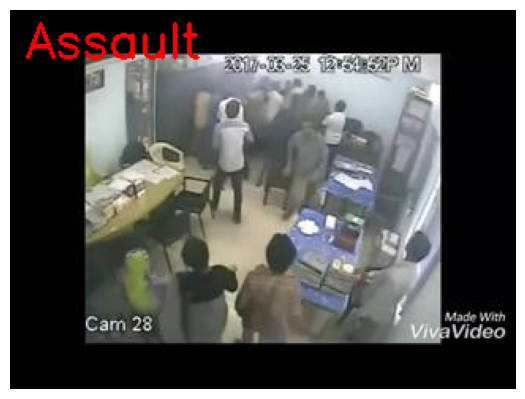

In [ ]:
# Create a Matplotlib figure
plt.figure(figsize = (30, 30))

# Get Names of all classes in UCF50
all_classes_names = os.listdir('/content/drive/MyDrive/HAR/PoC/Dataset1/train')

# Generate a random sample of images each time the cell runs
random_range = random.sample(range(len(all_classes_names)), 1)

# Iterating through all the random samples
for counter, random_index in enumerate(random_range, 1):

    # Getting Class Name using Random Index
    selected_class_Name = all_classes_names[random_index]

    # Getting a list of all the video files present in a Class Directory
    video_files_names_list = os.listdir(f'/content/drive/MyDrive/HAR/PoC/Dataset1/train/{selected_class_Name}')

    # Randomly selecting a video file
    selected_video_file_name = random.choice(video_files_names_list)

    # Reading the Video File Using the Video Capture
    video_reader = cv2.VideoCapture(f'/content/drive/MyDrive/HAR/PoC/Dataset1/train/{selected_class_Name}/{selected_video_file_name}')

    # Reading The First Frame of the Video File
    _, bgr_frame = video_reader.read()

    # Closing the VideoCapture object and releasing all resources.
    video_reader.release()

    # Converting the BGR Frame to RGB Frame
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Adding The Class Name Text on top of the Video Frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Assigning the Frame to a specific position of a subplot
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

In [ ]:
pip install rdflib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 6.3 MB/s eta 0:00:00


In [ ]:
import imageio  # to save GIFs
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
import cv2  # optional (for resizing the filter to look better)
img_size = 28
# Create/load some adjacency matrix A (for example, based on coordinates)
col, row = np.meshgrid(np.arange(img_size), np.arange(img_size))
coord = np.stack((col, row), axis=2).reshape(-1, 2) / img_size
dist = cdist(coord, coord)  # distances between all pairs of pixels
sigma = 0.2 * np.pi  # width of a Gaussian (can be a hyperparameter when training a model)
A = np.exp(- dist / sigma ** 2)  # adjacency matrix of spatial similarity
# above, dist should have been squared to make it a Gaussian (forgot to do that)
scale = 4
img_list = []
cmap = mpl.colormaps.get_cmap('viridis')

for i in np.arange(0, img_size, 4):  # for every row with step 4
    for j in np.arange(0, img_size, 4):  # for every col with step 4
        k = i*img_size + j
        img = A[k, :].reshape(img_size, img_size)
        img = (img - img.min()) / (img.max() - img.min())
        img = cmap(img)
        img[i, j] = np.array([1., 0, 0, 0])  # add the red dot
        img = cv2.resize(img, (img_size*scale, img_size*scale))
        img_list.append((img * 255).astype(np.uint8))
imageio.mimsave('sample.gif', img_list, format='GIF', duration=0.2)

In [ ]:
# Preparing the Data Set
image_height, image_width = 64, 64
max_images_per_class = 900
dataset_directory = "/content/drive/MyDrive/HAR/PoC/Dataset1/train"
classes_list = ["Abuse", "Arrest", "Assault","Burglary","Fighting"]

model_output_size = len(classes_list)

In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.8 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import LeakyReLU

def Create_LSTMModel():
  ConvNN_model = Sequential()
  ConvNN_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
  ConvNN_model.add(MaxPooling2D((2, 2)))
  ConvNN_model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(224,224,3)))
  ConvNN_model.add(TimeDistributed(LSTM(128, activation='relu')))
  ConvNN_model.add(Dropout(0.2))
  ConvNN_model.add(LSTM(64, activation='relu'))
  ConvNN_model.add(Dense(128, activation='relu'))
  ConvNN_model.add(LeakyReLU(alpha=0.1))
  ConvNN_model.add(Dropout(0.25))
  ConvNN_model.add(Dense(64, activation='relu'))
  ConvNN_model.add(Dense(5, activation='softmax'))
  ConvNN_model.summary();
  return ConvNN_model;

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 time_distributed (TimeDist  (None, 109, 128)          98816     
 ributed)                                                        
                                                                 
 dropout (Dropout)           (None, 109, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                4

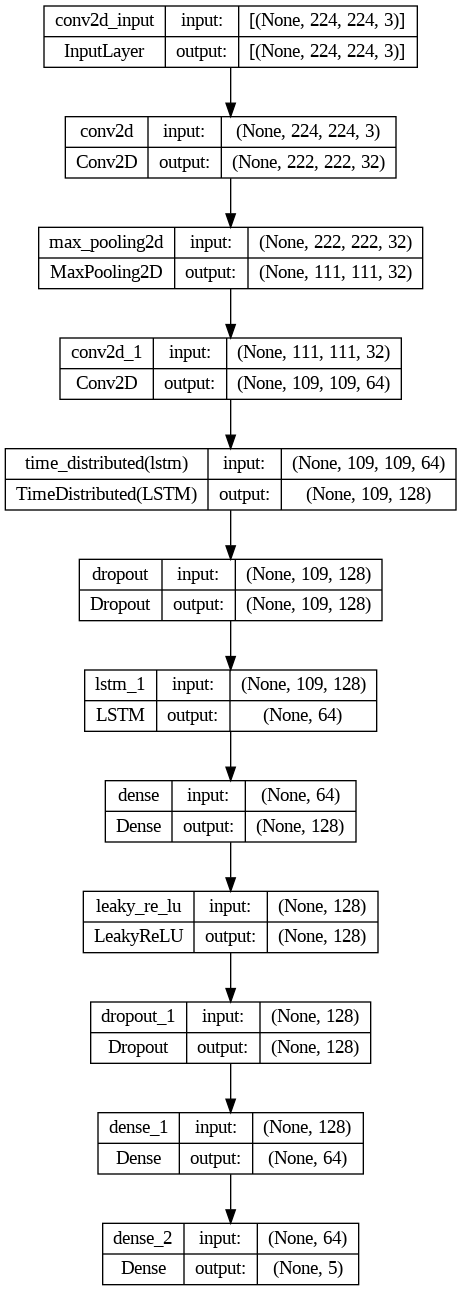

In [ ]:
model=Create_LSTMModel();
plot_model(model, to_file = 'model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
def bring_data_from_directory():
  #datagen = ImageDataGenerator(rescale=1. / 255)
  datagen = ImageDataGenerator();
  train_generator = datagen.flow_from_directory(
          '/content/drive/MyDrive/HAR/PoC/Dataset1/train',
          target_size=(224, 224),
          batch_size=32,
          class_mode='categorical',  # this means our generator will only yield batches of data, no labels
          classes=['Abuse','Arrest','Assault','Burglary','Fighting'])

  validation_generator = datagen.flow_from_directory(
          '/content/drive/MyDrive/HAR/PoC/Dataset1/test',
          target_size=(224, 224),
          batch_size=32,
          class_mode='categorical',  # this means our generator will only yield batches of data, no labels
          classes=['Abuse','Arrest','Assault','Burglary','Fighting'])
  return train_generator,validation_generator

In [ ]:
train_generator,validation_generator = bring_data_from_directory();

Found 494 images belonging to 5 classes.
Found 116 images belonging to 5 classes.


In [ ]:
# Adding Early Stopping Callback
from tensorflow.keras.optimizers import Adam

optimizer = Adam(clipvalue=0.5)
#regressor.compile(optimizer=optimizer, loss='mean_squared_error')


early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

# Adding loss, optimizer and metrics values to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ["accuracy"])

BATCH_SIZE = 10 # Batch Size
train_data_size = 4500 #
test_data_size = 450

#history_model = model.fit(training_generator,steps_per_epoch = train_data_size // BATCH_SIZE+1,epochs=100,
#validation_data=validation_generator,validation_steps = test_data_size // BATCH_SIZE+1,verbose=1)

history_model = model.fit(train_generator,steps_per_epoch = 2,epochs=5,
validation_data=validation_generator,verbose=1)

Epoch 1/5
2/2 [==============================] - 78s 59s/step - loss: 704.6192 - accuracy: 0.2188 - val_loss: 542.2891 - val_accuracy: 0.2241
Epoch 2/5
2/2 [==============================] - 32s 18s/step - loss: 389151.4688 - accuracy: 0.2188 - val_loss: 31986.5156 - val_accuracy: 0.1810
Epoch 3/5
2/2 [==============================] - 44s 27s/step - loss: nan - accuracy: 0.2344 - val_loss: nan - val_accuracy: 0.2069
Epoch 4/5
2/2 [==============================] - 30s 20s/step - loss: nan - accuracy: 0.1719 - val_loss: nan - val_accuracy: 0.2069
Epoch 5/5
2/2 [==============================] - 27s 18s/step - loss: nan - accuracy: 0.1875 - val_loss: nan - val_accuracy: 0.2069


In [ ]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = history_model.history[metric_name_1]
  metric_value_2 = history_model.history[metric_name_2]

  # Constructing a range object which will be used as time
  epochs = range(len(metric_value_1))

  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()

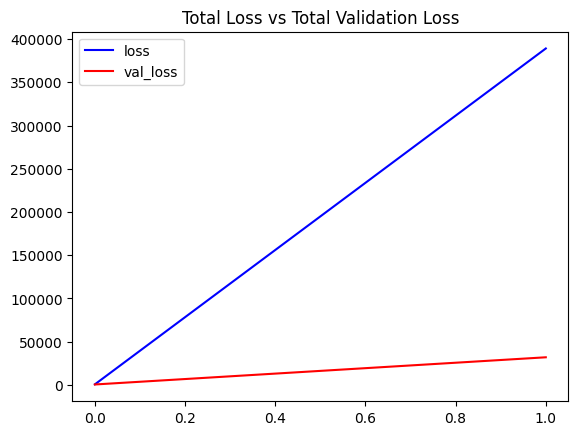

In [ ]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

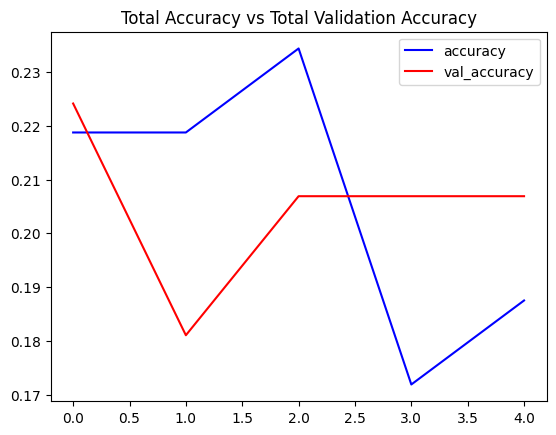

In [ ]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

test_data_size=450;
y_test = validation_generator.classes
#predicting our model with test dataset i.e. unseen dataset
pred = model.predict(validation_generator,test_data_size//BATCH_SIZE+1,verbose=1,).argmax(axis=1)
#Classification report of every label
print(classification_report(y_test,pred))

# evaluate the model
#scores = model.evaluate(train_set, test_set)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 11s 2s/step
              precision    recall  f1-score   support

           0       0.21      1.00      0.34        24
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        30

    accuracy                           0.21       116
   macro avg       0.04      0.20      0.07       116
weighted avg       0.04      0.21      0.07       116



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


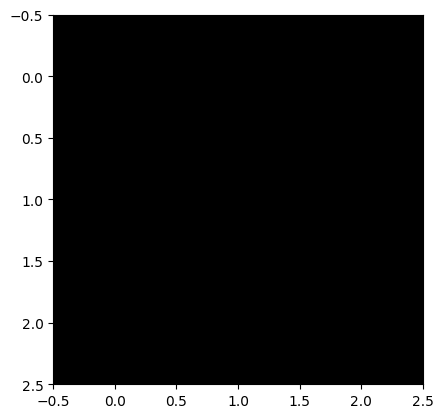

In [ ]:
#get the layers from a model
layer=model.layers
#plotting the first filter of the first convolutional layer
model = model.layers[0]
plt.imshow(model.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')

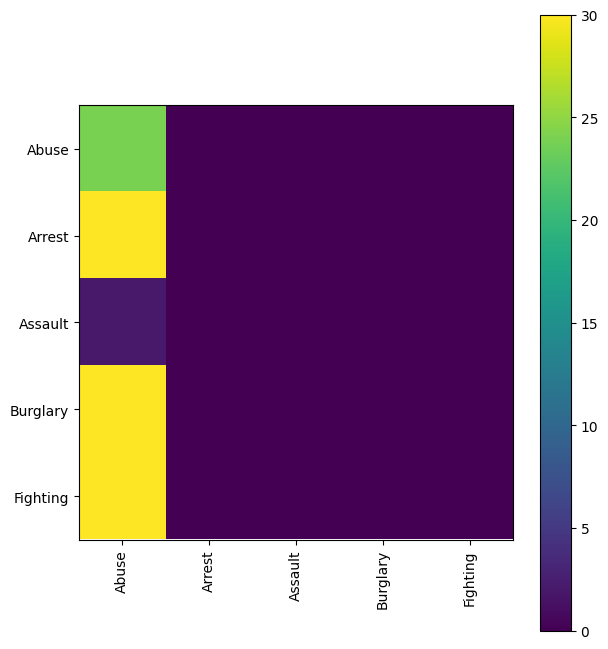

In [ ]:
labels = validation_generator.class_indices
labels = { v:k for k,v in labels.items() } # Flipping keys and values
values_lbl = list(labels.values()) # Taking out only values from dictionary

conf = confusion_matrix(y_test,pred)
plt.figure(figsize=(7,8))
plt.imshow(conf, interpolation='nearest')
plt.colorbar()
plot_mark = np.arange(len(values_lbl))
_ = plt.xticks(plot_mark, values_lbl, rotation=90)
_ = plt.yticks(plot_mark, values_lbl)


In [ ]:
total_count=0
for i in range(len(y_test)):
    if y_test[i] != pred[i]:
        total_count += 1
print('Total number of test cases', ((len(y_test))))
print('Number of wrong predictions', total_count)

Total number of test cases 116
Number of wrong predictions 92


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
Normalized confusion matrix


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

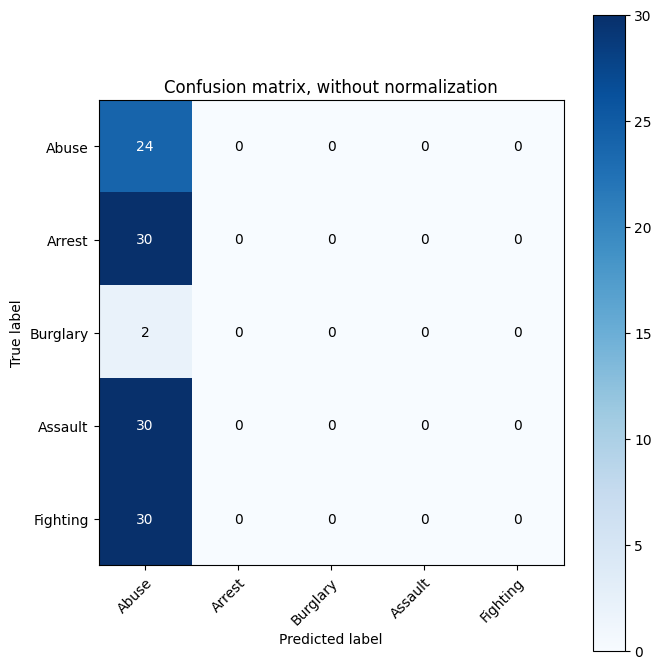

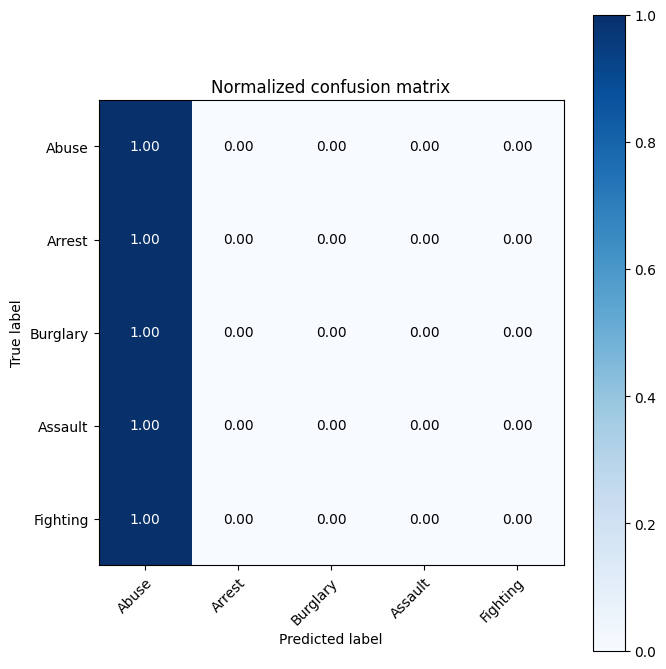

In [ ]:
 np.set_printoptions(precision=2)


#Plotting the confusion matrix
confusion_mtx = confusion_matrix(y_test, pred)

#Defining the class labels
class_names = ['Abuse', 'Arrest', 'Burglary', 'Assault', 'Fighting']


# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_test, pred, classes = class_names, title='Confusion matrix, without normalization')


#Plotting normalized confusion matrix
plot_confusion_matrix(y_test, pred, classes = class_names, normalize = True, title = 'Normalized confusion matrix')

In [ ]:
import imageio  # to save GIFs
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
import cv2  # optional (for resizing the filter to look better)
img_size = 28
# Create/load some adjacency matrix A (for example, based on coordinates)
col, row = np.meshgrid(np.arange(img_size), np.arange(img_size))
coord = np.stack((col, row), axis=2).reshape(-1, 2) / img_size
dist = cdist(coord, coord)  # distances between all pairs of pixels
sigma = 0.2 * np.pi  # width of a Gaussian (can be a hyperparameter when training a model)
A = np.exp(- dist / sigma ** 2)  # adjacency matrix of spatial similarity
# above, dist should have been squared to make it a Gaussian (forgot to do that)
scale = 4
img_list = []
cmap = mpl.cm.get_cmap('viridis')
for i in np.arange(0, img_size, 4):  # for every row with step 4
    for j in np.arange(0, img_size, 4):  # for every col with step 4
        k = i*img_size + j
        img = A[k, :].reshape(img_size, img_size)
        img = (img - img.min()) / (img.max() - img.min())
        img = cmap(img)
        img[i, j] = np.array([1., 0, 0, 0])  # add the red dot
        img = cv2.resize(img, (img_size*scale, img_size*scale))
        img_list.append((img * 255).astype(np.uint8))
imageio.mimsave('sample.gif', img_list, format='GIF', duration=0.2)

<ipython-input-29-467539c0a65e>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis')
